# Vanila LSTM

In [1]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_sequence(length):
    freq = 10
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

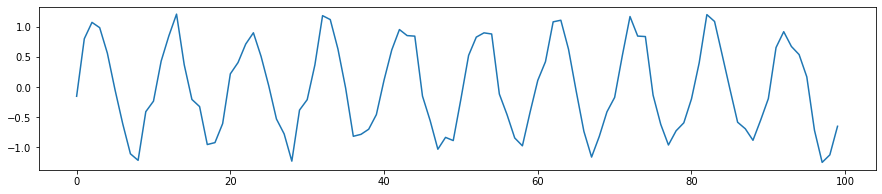

In [3]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()


In [4]:
def generate_examples(length, n_samples, output):
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence = get_sequence(length + output)
        
        X.append(sequence[:-output])
        y.append(sequence[-output:])
        
    X = np.array(X).reshape(n_samples, length,1)
    y = np.array(y).reshape(n_samples, output)
    
    return X, y

In [5]:
X,y = generate_examples(length=100, n_samples=50, output=5)

In [6]:
X.shape, y.shape

((50, 100, 1), (50, 5))

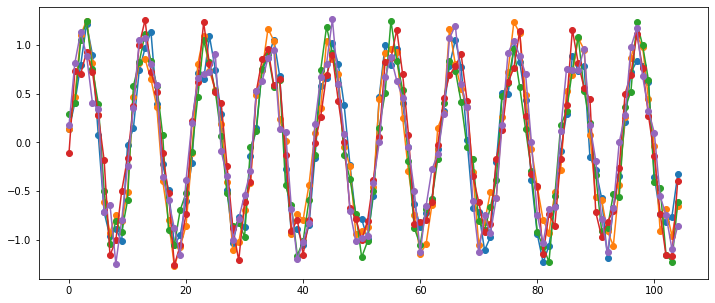

In [7]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5, 5)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

In [8]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM,Dense

2022-05-10 01:44:38.509171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-10 01:44:38.509216: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
# configure problem
sequence_length = 1000
hidden_units = 100
output_length = 250
n_features = 1

In [10]:
# define model
model = Sequential(name = 'vanila-LSTM')

model.add(LSTM(100,\
              input_shape=(sequence_length, n_features),\
              name = 'first-LSTM-layer'))

model.add(Dense(output_length,\
            name = "dense-layer")) 

model.compile(loss='mean_squared_error',\
              optimizer='rmsprop',\
              metrics='accuracy')

print(model.summary())

2022-05-10 01:44:40.460874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-10 01:44:40.460911: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-10 01:44:40.460932: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-63-144.us-west-2.compute.internal): /proc/driver/nvidia/version does not exist
2022-05-10 01:44:40.461370: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vanila-LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first-LSTM-layer (LSTM)     (None, 100)               40800     
                                                                 
 dense-layer (Dense)         (None, 250)               25250     
                                                                 
Total params: 66,050
Trainable params: 66,050
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#First Layer
n = 1 #input vetor x
m = 100 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

40800


In [12]:
#Dense Layer
n = 100 #input vetor x
m = 250 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

25250


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [13]:
sequence_length = 1000
output_length = 250

In [14]:
X, y = generate_examples(sequence_length, 1000, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [15]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
100/100 [==============================] - 36s 343ms/step - loss: 0.0544 - accuracy: 0.0450 - val_loss: 0.0322 - val_accuracy: 0.0300
Epoch 2/5
100/100 [==============================] - 34s 337ms/step - loss: 0.0324 - accuracy: 0.0450 - val_loss: 0.0315 - val_accuracy: 0.0550
Epoch 3/5
100/100 [==============================] - 34s 338ms/step - loss: 0.0315 - accuracy: 0.0510 - val_loss: 0.0314 - val_accuracy: 0.0300
Epoch 4/5
100/100 [==============================] - 34s 336ms/step - loss: 0.0313 - accuracy: 0.0500 - val_loss: 0.0311 - val_accuracy: 0.0600
Epoch 5/5
100/100 [==============================] - 34s 338ms/step - loss: 0.0312 - accuracy: 0.0570 - val_loss: 0.0308 - val_accuracy: 0.0550


In [16]:
print(history.history)

{'loss': [0.05440744757652283, 0.03237165883183479, 0.03152524679899216, 0.03134031966328621, 0.031218932941555977], 'accuracy': [0.04500000178813934, 0.04500000178813934, 0.050999999046325684, 0.05000000074505806, 0.05700000002980232], 'val_loss': [0.03217596188187599, 0.031450044363737106, 0.03140922635793686, 0.031107919290661812, 0.030838770791888237], 'val_accuracy': [0.029999999329447746, 0.054999999701976776, 0.029999999329447746, 0.05999999865889549, 0.054999999701976776]}


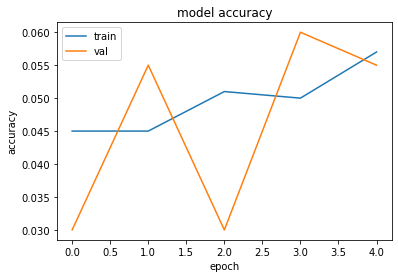

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

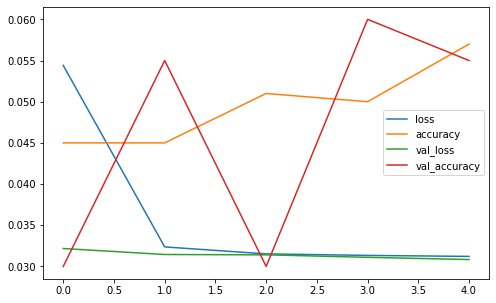

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [19]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0) 
print(loss)

[0.03095608949661255, 0.029999999329447746]


In [ ]:
# prediction on new data
X, y = generate_examples(sequence_length, 20, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0], label='yhat') 
plt.legend()
plt.show()


### Explore Weights

In [ ]:
for array in model.layers[0].get_weights():
    print (array.shape)

In [ ]:
48 + (12*48) +48

In [ ]:
#First Layer
n = 1 #input vetor x
m = 12 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

In [ ]:
#g*(n+m+1)*m = g*n + (g*m*m) + g*m
#4*(1+12+1)*12 = (4*12) + (12*48) + (4*12)

- Second layer

In [ ]:
for array in model.layers[1].get_weights():
    print (array.shape)